### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гусейнов Вахид Азерович
##### Группа:   НБИбд-01-17

## Москва 2020
***

### Вариант № 26

Parkinsons Disease Data Set

Название файла: parkinsons.data

Ссылка: http://archive.ics.uci.edu/ml/datasets/Parkinsons

Первый признак: MDVP:Fhi(Hz) (столбец No 3)

Второй признак: MDVP:Flo(Hz) (столбец No 4)

Третий признак: DFA (столбец No 20)

1.  Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

Метка класса - status

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
data = pd.read_csv(url, usecols=['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA', 'status'])
features = ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'DFA']
data.head()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),status,DFA
0,157.302,74.997,1,0.815285
1,148.650,113.819,1,0.819521
2,131.111,111.555,1,0.825288
3,137.871,111.366,1,0.819235
4,141.781,110.655,1,0.823484


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

In [3]:
(data == '?').sum()

MDVP:Fhi(Hz)    0
MDVP:Flo(Hz)    0
status          0
DFA             0
dtype: int64

Нет пропусков

3. Масштабируйте признаки набора данных на интервал от 0 до 1.

In [4]:
X = data.drop(columns='status').values
yy = data['status'].values

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

4. Визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

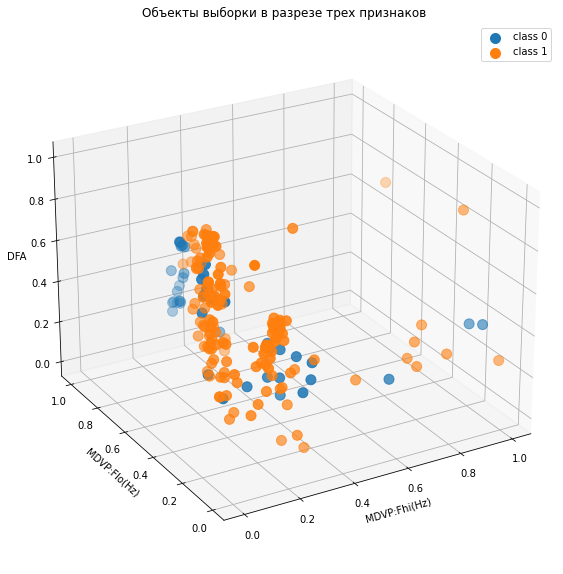

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for target_val in (0, 1):    
    x = X_scaled[yy == target_val, 0]
    y = X_scaled[yy == target_val, 1]
    z = X_scaled[yy == target_val, 2]
    ax.scatter(x, y, z, s=100, label=f'class {target_val}')
    
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.view_init(azim=-120, elev=25)

plt.legend()
plt.title('Объекты выборки в разрезе трех признаков')
plt.show()

5. Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью наивного байесовского классификатора.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.25)

model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

6. Постройте и выведите на экран отчет о классификации и матрицу ошибок

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f'Отчет классификации\n{classification_report(y_test, preds)}')

cm = (confusion_matrix(y_test, preds))
cmdf = pd.DataFrame(cm, index=['class 0', 'class 1'], columns=['class 0', 'class 1'])
print("Матрица ошибок:\n")
cmdf

Отчет классификации
              precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.74      0.94      0.83        33

    accuracy                           0.73        49
   macro avg       0.73      0.63      0.63        49
weighted avg       0.73      0.73      0.70        49

Матрица ошибок:



,class 0,class 1
class 0,5,11
class 1,2,31


7. Найдите точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам.

In [10]:
from sklearn.model_selection import cross_val_score

print('Точность на кросс-валидации:\n')
cross_val_score(GaussianNB(), X, yy, cv=5, scoring='accuracy').mean()

Точность на кросс-валидации:



0.7692307692307693

8. Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Optimal number on neighbors = 3


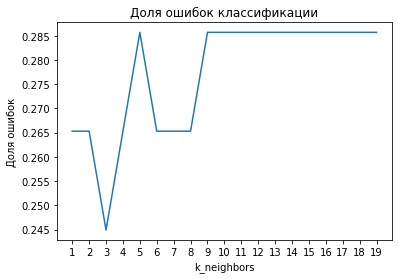

In [12]:
k_neighs = [i for i in range(1, 20)]
scores = [] # здесь будут доли ошибок
for k_neigh in k_neighs:
    knn = KNeighborsClassifier(k_neigh)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    scores.append(np.mean(preds != y_test))
plt.plot(k_neighs, scores)
plt.title('Доля ошибок классификации')
plt.xlabel('k_neighbors')
plt.ylabel('Доля ошибок')
plt.xticks(k_neighs)
best_k = k_neighs[scores.index(min(scores))]
print(f'Optimal number on neighbors = {best_k}')

9.  Найдите точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.

In [13]:
print('Точность на кросс-валидации:\n')
cross_val_score(KNeighborsClassifier(best_k), X, yy, cv=5, scoring='accuracy').mean()

Точность на кросс-валидации:



0.7230769230769231

10. Определите, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам.

Наивный байес лучше.

11. Проведите классификацию точек набора данных лучшим методом и визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

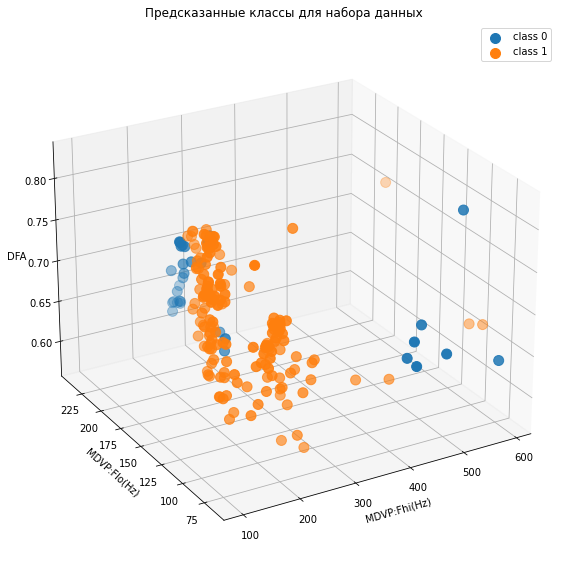

In [14]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(GaussianNB(), X, yy, cv=5)

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

for target_val in (0, 1):    
    x = X[preds == target_val, 0]
    y = X[preds == target_val, 1]
    z = X[preds == target_val, 2]
    ax.scatter(x, y, z, s=100, label=f'class {target_val}')
    
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.view_init(azim=-120, elev=25)

plt.legend()
plt.title('Предсказанные классы для набора данных')
plt.show()